___
# Excercise 7
**Name: Martine Dyring Hansen**
____

### Problem 1

In [62]:
import numpy as np
import matplotlib.pyplot as plt


def Euler(f, t0, T, h, y0, **kwargs):
    y_arr = np.zeros(shape=(int(T - t0), 2))
    y_arr[0] = y0

    for i in range(1, len(y_arr)):
        y_arr[i] = y_arr[i - 1] + h * f(t0 + i - 1, y_arr[i - 1], **kwargs)

    return y_arr


def Heun(f, t0, T, h, y0, **kwargs):
    y_arr = np.zeros(shape=(int(T - t0), 2))
    y_arr[0] = y0

    for i in range(1, len(y_arr)):
        K1 = f(t0 + i - 1, y_arr[i - 1], **kwargs)
        K2 = f(t0 + i - 1 + h, y_arr[i - 1] + h * K1, **kwargs)
        y_arr[i] = y_arr[i - 1] + h / 2 * (K1 + K2)

    return y_arr


def VottkaVolterra(tn, yn, alpha, beta, gamma, delta):
    dxdt = alpha * yn[0] - beta * yn[0] * yn[1]
    dydt = delta * yn[0] * yn[1] - gamma * yn[1]

    return np.array([dxdt, dydt])

In [87]:
y0 = np.array([100, 10])
t0 = 0
T = 20
alpha = 1
beta = 0.05
delta = 0.05
gamma = 2
h = 0.1

yEuler_arr = Euler(
    f=VottkaVolterra,
    t0=t0,
    T=T,
    h=h,
    y0=y0,
    alpha=alpha,
    beta=beta,
    gamma=gamma,
    delta=delta,
)

yHeun_arr = Heun(
    f=VottkaVolterra,
    t0=t0,
    T=T,
    h=h,
    y0=y0,
    alpha=alpha,
    beta=beta,
    gamma=gamma,
    delta=delta,
)

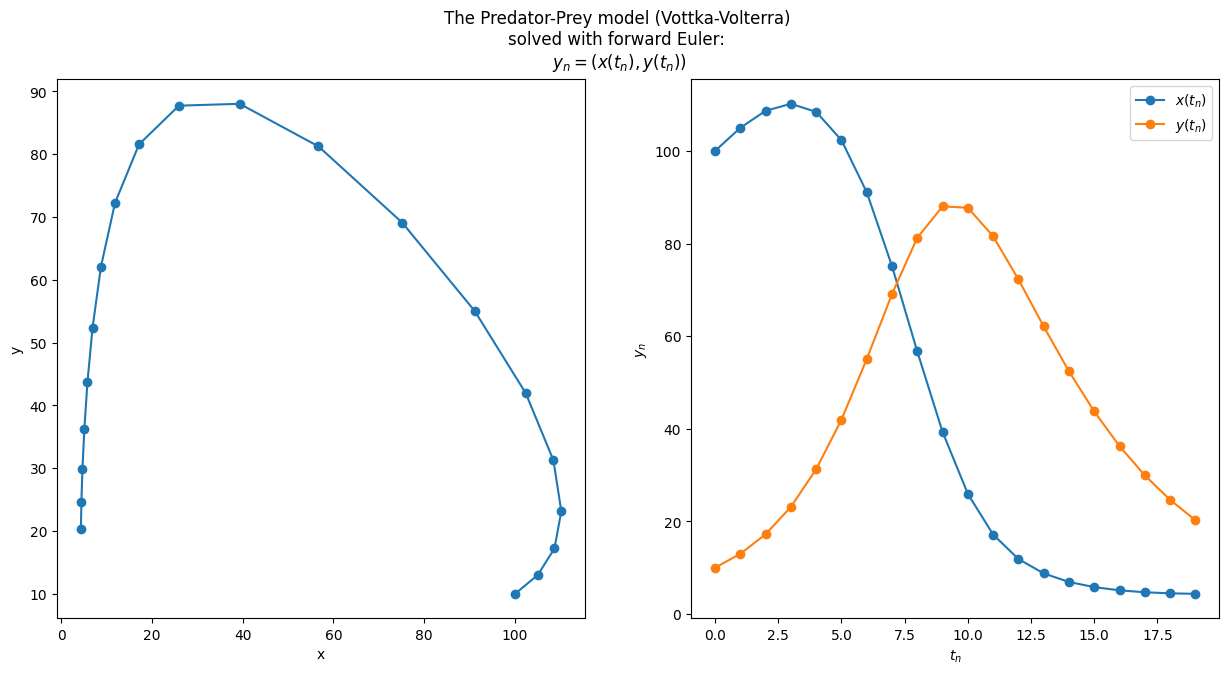

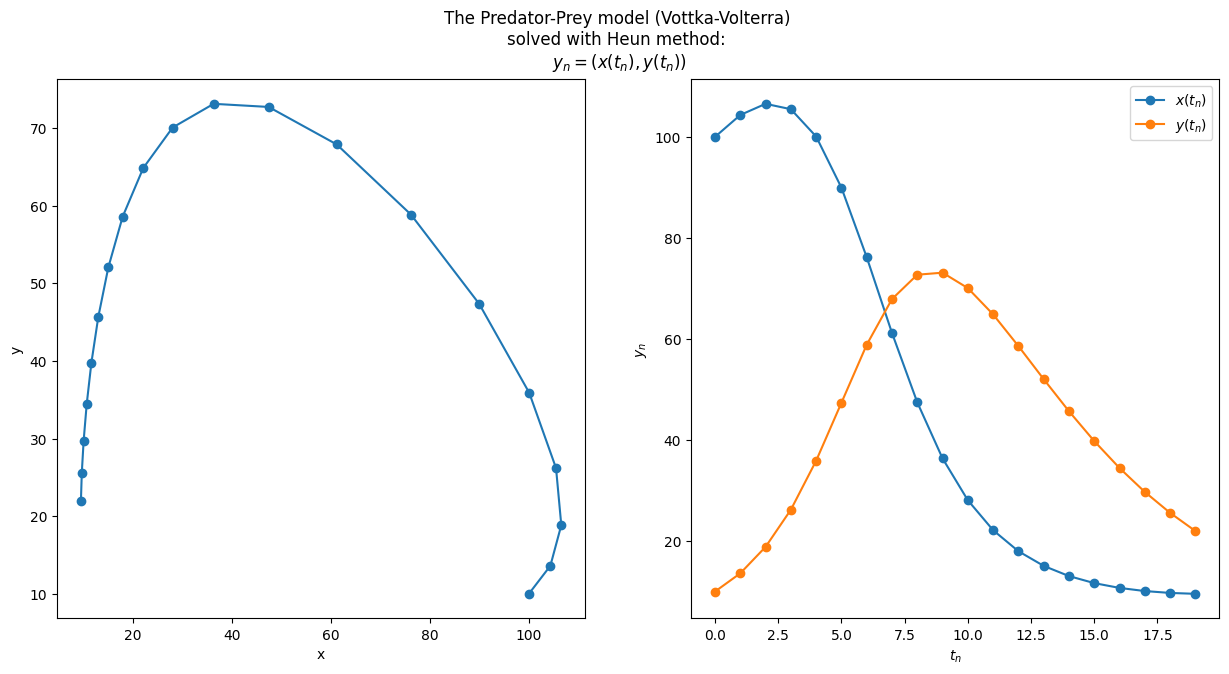

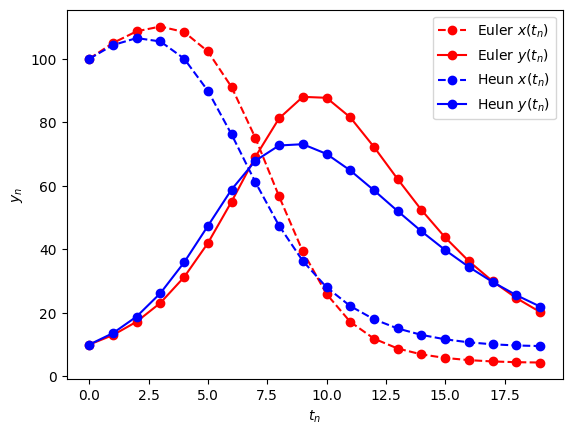

In [88]:
for y_arr, name in zip([yEuler_arr, yHeun_arr], ["forward Euler", "Heun method"]):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    axs[0].plot(y_arr[:, 0], y_arr[:, 1], "o-")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")

    axs[1].plot(np.arange(t0, T), y_arr[:, 0], "o-", label="$x(t_n)$")
    axs[1].plot(np.arange(t0, T), y_arr[:, 1], "o-", label="$y(t_n)$")
    axs[1].set_xlabel("$t_n$")
    axs[1].set_ylabel("$y_n$")
    axs[1].legend()
    plt.suptitle(
        f"The Predator-Prey model (Vottka-Volterra) \nsolved with {name}: \n$y_n=(x(t_n), y(t_n))$"
    )
    plt.show()

plt.plot(np.arange(t0, T), yEuler_arr[:, 0], "o--", color="red", label="Euler $x(t_n)$")
plt.plot(np.arange(t0, T), yEuler_arr[:, 1], "o-", color="red", label="Euler $y(t_n)$")
plt.plot(np.arange(t0, T), yHeun_arr[:, 0], "o--", color="blue", label="Heun $x(t_n)$")
plt.plot(np.arange(t0, T), yHeun_arr[:, 1], "o-", color="blue", label="Heun $y(t_n)$")
plt.xlabel("$t_n$")
plt.ylabel("$y_n$")
plt.legend()
plt.show()